### ANÁLISIS DE DATASET BREAST CANCER WISCONSIN
#### IMPORTAR LIBRERÍAS

In [442]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import os
import re
from statistics import mode

#### DEFINICIÓN DE FUNCIONES

In [452]:
# DEFINICIÓN DE FUNCIÓN PARA VERIFICAR REGISTROS NULOS
def null_values(dataset):
    import pandas as pd        #IMPORTAR LIBRERÍA PANDAS
    x=dataset.isna().sum()
    if len(x[x>0])>0:
        d={'NullRecord': x[x>0],'TotalRecord':dataset.shape[0]}
        y=pd.DataFrame(d)
        y["CompleteRecord"]=y["TotalRecord"]-y["NullRecord"]
        y["CompleteRecord_Rate"]=round((y["CompleteRecord"]/y["TotalRecord"])*100,3)
        return y.sort_values("NullRecord",ascending=True)
    else:
        print("No hay registros vacios")

In [548]:
# DEFINICIÓN DE FUNCION PARA VERIFICAR VALORES EN CERO
def zero_values(dataset):
    d={'TotalRecord': dataset.shape[0], 'Cantidad de Ceros':0, 'Proporción de Ceros \(\%\)':0}
    y=pd.DataFrame(d, index=dataset.columns)
    for c in dataset.columns:
        y.loc[c,'Cantidad de Ceros']=len(dataset[dataset[c]==0])
        y.loc[c,'Proporción de Ceros \(\%\)']=round((y.loc[c,'Cantidad de Ceros'] / y.loc[c,"TotalRecord"] ),2)*100
    if len(dataset[dataset[c]==0])>0:
        return y[y['Cantidad de Ceros']>0]
    else:
        print('No se encontraron valores en cero.')

In [469]:
# DEFINICIÓN DE FUNCIÓN PARA GENERAR UN HISTOGRAMA DE CADA VARIABLE
def data_hist(dataset,columns):
    k=int(np.ceil(1+np.log2(cancer.shape[0])))
    for i in columns:
        plt.figure(figsize=(10,5))
        plt.title(i)
        plt.rcParams['figure.facecolor'] = 'white'
        ax=sns.distplot(dataset[i], 
                     bins=k,
                     kde=False,
                     #rug=True
                    )
        ax.set_facecolor('white')
        ax.spines["bottom"].set_color("black")
        ax.spines["left"].set_color("black")
        ax.tick_params(axis='x', colors='black')
        ax.tick_params(axis='y', colors='black')
        ax.xaxis.label.set_color('black')
        ax.yaxis.label.set_color('black')
        ax.spines["top"].set_color("white")
        ax.spines["right"].set_color("white")
        for rect in ax.patches:
            y_value = rect.get_height()
            x_value = rect.get_x() + rect.get_width() / 2
            space = 2
            va = 'bottom'
            if y_value < 0:
                space *= -1
                va = 'top'
            label = "{:.0f}".format(y_value)
            ax.annotate(
                label,                      # Use `label` as label
                (x_value, y_value),         # Place label at end of the bar
                xytext=(0, space),          # Vertically shift label by `space`
                textcoords="offset points", # Interpret `xytext` as offset in points
                ha='center',                # Horizontally center label
                va=va)

In [520]:
# DEFINICIÓN DE FUNCIÓN PARA ENCONTRAR Y ELIMINAR DUPLICADOS
def duplicates(dataset,drop=True):
    duplicate_rows_df=dataset[dataset.duplicated(keep=False)] 
    if len(duplicate_rows_df)>0:
        print("Cantidad de Registros Duplicados: %s."%int((duplicate_rows_df.shape[0]/2)))
        duplicate_rows_df
        if drop==True:
            dataset.drop_duplicates(inplace=True)
            print('Los duplicados se han eliminado correctamente')
    else:
        print('No se encuentran registros duplicados.')

In [467]:
# DEFINICIÓN DE FUNCIÓN PARA REALIZAR UN CORPLOT
def corplot(df,method='pearson',decimals=2,color="Blues"):
    c=round(df.corr(method),decimals)
    mask = np.zeros_like(c)
    mask[np.triu_indices_from(mask)] = True
    with sns.axes_style("white"):
        f, ax = plt.subplots(figsize=(20,15))
        ax = sns.heatmap(c, mask=mask, vmax=.1, square=True,cmap=color,annot=True,cbar=False)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
    plt.show()

#### NOMBRES DE COLUMNAS

In [501]:
# IMPORTAR INFORMACION DE DATASET
filepath='C:/Users/aleja/datascience/datasets/cancer'
file_info_name='breast-cancer-wisconsin.names.txt'
full_info_path=os.path.join(filepath,file_info_name)
info=open(full_info_path)
info_content=info.read()
print(info_content)
info.close()

Citation Request:
   This breast cancer databases was obtained from the University of Wisconsin
   Hospitals, Madison from Dr. William H. Wolberg.  If you publish results
   when using this database, then please include this information in your
   acknowledgements.  Also, please cite one or more of:

   1. O. L. Mangasarian and W. H. Wolberg: "Cancer diagnosis via linear 
      programming", SIAM News, Volume 23, Number 5, September 1990, pp 1 & 18.

   2. William H. Wolberg and O.L. Mangasarian: "Multisurface method of 
      pattern separation for medical diagnosis applied to breast cytology", 
      Proceedings of the National Academy of Sciences, U.S.A., Volume 87, 
      December 1990, pp 9193-9196.

   3. O. L. Mangasarian, R. Setiono, and W.H. Wolberg: "Pattern recognition 
      via linear programming: Theory and application to medical diagnosis", 
      in: "Large-scale numerical optimization", Thomas F. Coleman and Yuying
      Li, editors, SIAM Publications, Philadelphia 199

In [502]:
# OBTENER LOS NOMBRES DE LOS ATRIBUTOS EN UNA LISTA
attribute_re=re.compile(r'''
(\d{1,2}\.\s)
([a-zA-z\.\s]+)
''',re.VERBOSE)
extracted_attribute=attribute_re.findall(info_content)
extracted_attribute=extracted_attribute[17:28]

In [503]:
# GENERAR UNA LISTA CON LOS NOMBRES DE LAS COLUMNAS
column_names=[]
for attribute in extracted_attribute:
    column_names.append(attribute[1])
column_names

['Sample code number            id number\n   ',
 'Clump Thickness               ',
 'Uniformity of Cell Size       ',
 'Uniformity of Cell Shape      ',
 'Marginal Adhesion             ',
 'Single Epithelial Cell Size   ',
 'Bare Nuclei                   ',
 'Bland Chromatin               ',
 'Normal Nucleoli               ',
 'Mitoses                       ',
 'Class']

In [504]:
# LIMPIEZA DE NOMBRES DE COLUMNAS
j=0
for i in column_names:
    column_names[j]=i.rstrip()
    j+=1
column_names[0]='Sample code number'

#### CARGA DE DATOS

In [521]:
# CARGAR DATASET Y COLOCAR NOMBRE DE COLUMAS
file_data_path='breast-cancer-wisconsin.data.txt'
full_data_path=os.path.join(filepath,file_data_path)
data=pd.read_csv(full_data_path,sep=',',names=column_names)
cancer=data.copy()
cancer.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [522]:
# TAMAÑO DEL DATASET
cancer.shape
print('El dataset contiene %s filas y %s columnas' %(cancer.shape[0],cancer.shape[1]))

El dataset contiene 699 filas y 11 columnas


In [539]:
cancer.dtypes

Sample code number             int64
Clump Thickness                int64
Uniformity of Cell Size        int64
Uniformity of Cell Shape       int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bare Nuclei                    int32
Bland Chromatin                int64
Normal Nucleoli                int64
Mitoses                        int64
Class                          int64
dtype: object

In [524]:
# VALORES DE LA VARIABLE CLASE
list(cancer.Class.unique())
print('Los valores de la clase son %s y %s.\nRepresentan si la muestra corresponde con un tumor benigno o maligno respectivamente'%(list(cancer.Class.unique())[0],list(cancer.Class.unique())[1]))

Los valores de la clase son 2 y 4.
Representan si la muestra corresponde con un tumor benigno o maligno respectivamente


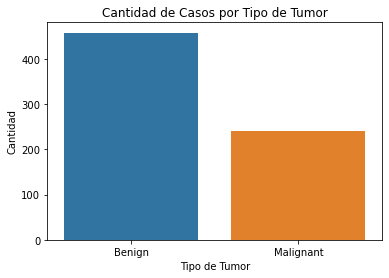

In [525]:
# ANALISIS DE LA VARIABLE CLASE
type=['Benign','Malignant']
sns.countplot(x='Class',data=cancer)
plt.xticks(range(len(list(cancer.Class.unique()))),type)
plt.ylabel('Cantidad')
plt.xlabel('Tipo de Tumor')
plt.title('Cantidad de Casos por Tipo de Tumor')
plt.show()

In [552]:
# SE VERIFICAN VALORES NULOS
null_values(cancer)

No hay registros vacios


In [553]:
# SE VERIFICAN VALORES EN CERO
zero_values(cancer)

No se encontraron valores en cero.


In [550]:
# SE VERIFICAN VALORES ÚNICOS
cancer.nunique(dropna=False)

Sample code number             645
Clump Thickness                 10
Uniformity of Cell Size         10
Uniformity of Cell Shape        10
Marginal Adhesion               10
Single Epithelial Cell Size     10
Bare Nuclei                     10
Bland Chromatin                 10
Normal Nucleoli                 10
Mitoses                          9
Class                            2
dtype: int64

In [554]:
# SE ENCUENTRAN REGISTROS DUPLICADOS DEBIDO A QUE len(cancer['Sample code number'])>cancer['Sample code number '].nunique()
# SE VERIFICAN VALORES DUPLICADOS Y ELIMINA EN CASO DE CORRESPONDER
duplicates(cancer,drop=True)

No se encuentran registros duplicados.


In [590]:
# SE VERIFICAN VALORES UNICOS EN CADA ATRIBUTO
cols=column_names[1:]
for i in cols:
    print(i)
    print(list(cancer[i].unique()))

Clump Thickness
[5, 3, 6, 4, 8, 1, 2, 7, 10, 9]
Uniformity of Cell Size
[1, 4, 8, 10, 2, 3, 7, 5, 6, 9]
Uniformity of Cell Shape
[1, 4, 8, 10, 2, 3, 5, 6, 7, 9]
Marginal Adhesion
[1, 5, 3, 8, 10, 4, 6, 2, 9, 7]
Single Epithelial Cell Size
[2, 7, 3, 1, 6, 4, 5, 8, 10, 9]
Bare Nuclei
[1, 10, 2, 4, 3, 9, 7, 5, 8, 6]
Bland Chromatin
[3, 9, 1, 2, 4, 5, 7, 8, 6, 10]
Normal Nucleoli
[1, 2, 7, 4, 5, 3, 10, 6, 9, 8]
Mitoses
[1, 5, 4, 2, 3, 7, 10, 8, 6]
Class
[2, 4]


In [537]:
# CORRECCIÓN DE VALORES DE COLUMNA "BARE NUCLEI" CON VALOR '?'
bare_nuclei=cancer[cancer['Bare Nuclei']=='?']
i=cancer[cancer['Bare Nuclei']=='?'].index
cancer=cancer.drop(i)
cancer['Bare Nuclei']=cancer['Bare Nuclei'].astype(int)
bare_nuclei['Bare Nuclei']=bare_nuclei['Bare Nuclei'].replace(r'?',np.nan)
bare_nuclei['Bare Nuclei']=bare_nuclei['Bare Nuclei'][bare_nuclei['Class']==4].replace(np.nan,mode(cancer['Bare Nuclei'][cancer['Class']==4]))
bare_nuclei['Bare Nuclei']=bare_nuclei['Bare Nuclei'].replace(np.nan,mode(cancer['Bare Nuclei'][cancer['Class']==2]))
cancer=cancer.append(bare_nuclei,ignore_index=True)
cancer['Bare Nuclei']=cancer['Bare Nuclei'].astype(int)
cols=column_names[1:]
for i in cols:
    print(i)
    print(list(cancer[i].unique()))

Clump Thickness
[5, 3, 6, 4, 8, 1, 2, 7, 10, 9]
Uniformity of Cell Size
[1, 4, 8, 10, 2, 3, 7, 5, 6, 9]
Uniformity of Cell Shape
[1, 4, 8, 10, 2, 3, 5, 6, 7, 9]
Marginal Adhesion
[1, 5, 3, 8, 10, 4, 6, 2, 9, 7]
Single Epithelial Cell Size
[2, 7, 3, 1, 6, 4, 5, 8, 10, 9]
Bare Nuclei
[1, 10, 2, 4, 3, 9, 7, 5, 8, 6]
Bland Chromatin
[3, 9, 1, 2, 4, 5, 7, 8, 6, 10]
Normal Nucleoli
[1, 2, 7, 4, 5, 3, 10, 6, 9, 8]
Mitoses
[1, 5, 4, 2, 3, 7, 10, 8, 6]
Class
[2, 4]


#### ANÁLISIS DE VARIABLES

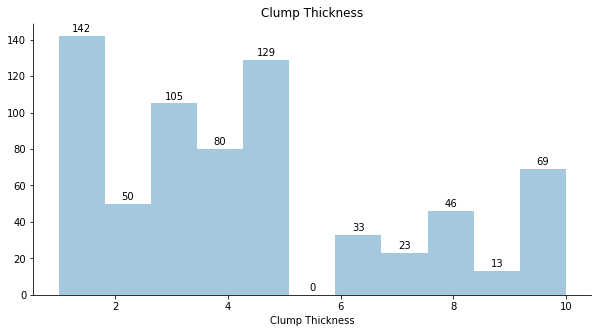

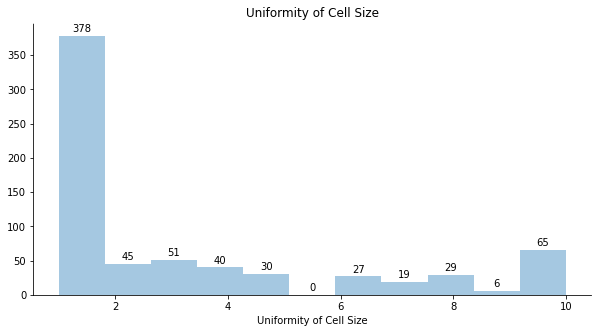

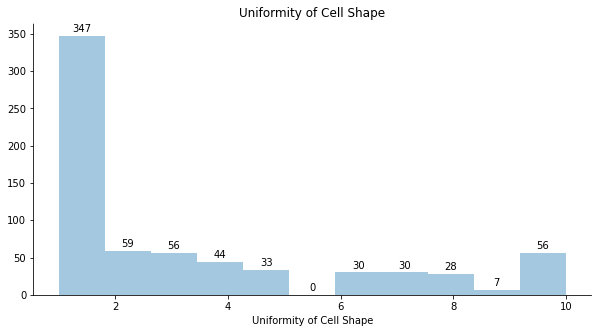

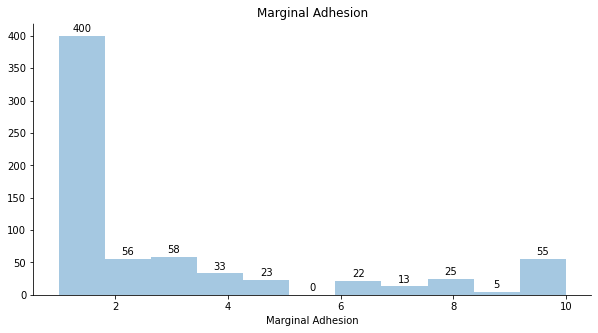

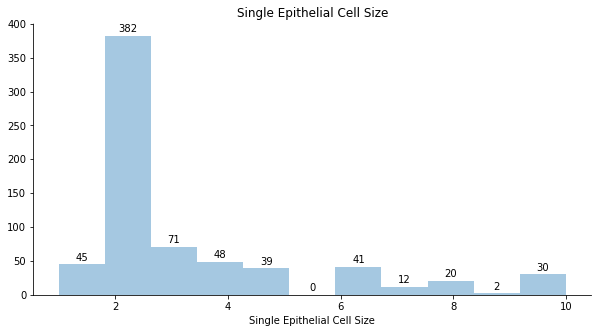

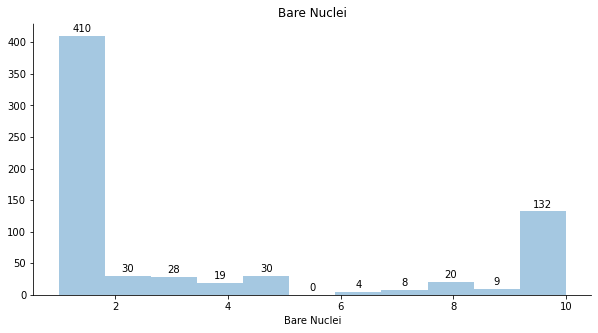

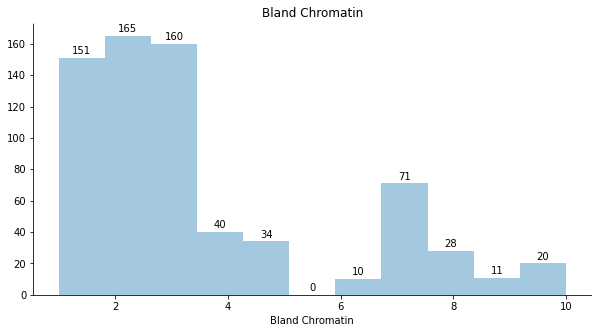

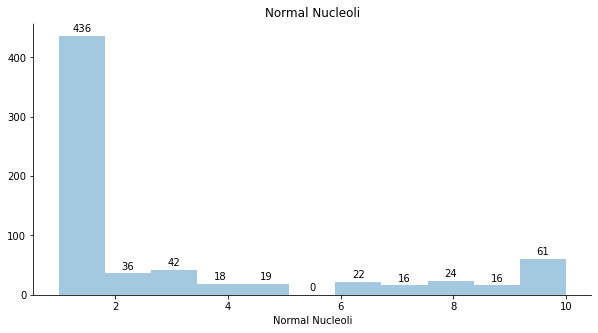

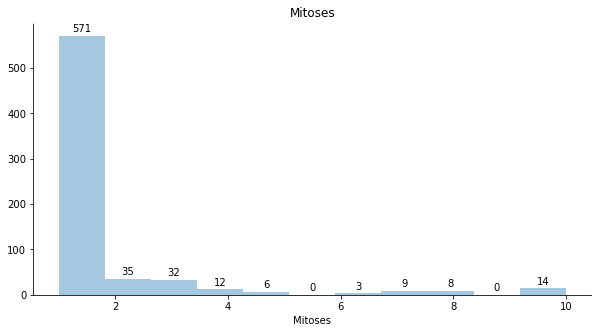

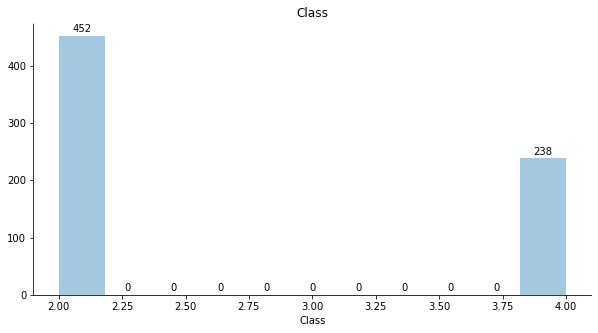

In [538]:
# GRAFICOS DE FRECUENCIA PARA CADA VARIABLE MENOS EL ID
data_hist(cancer,cols)

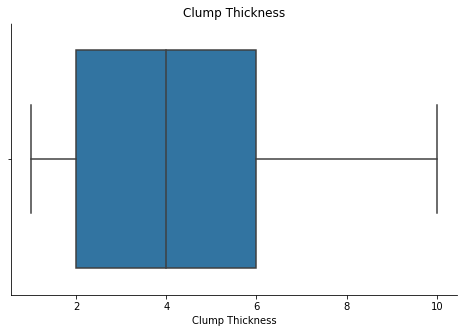

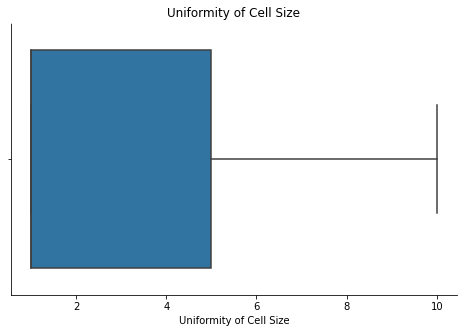

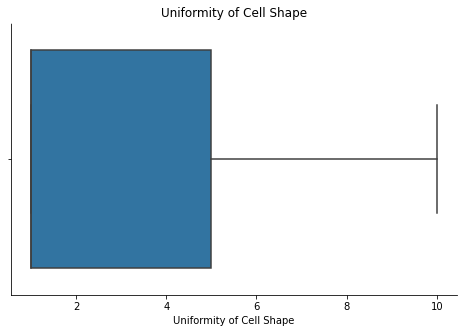

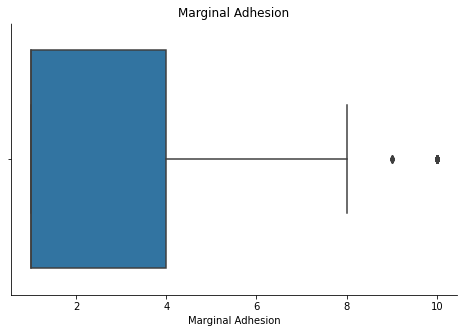

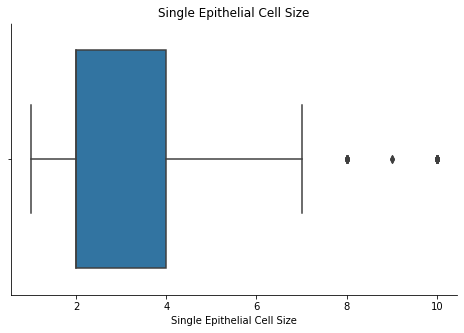

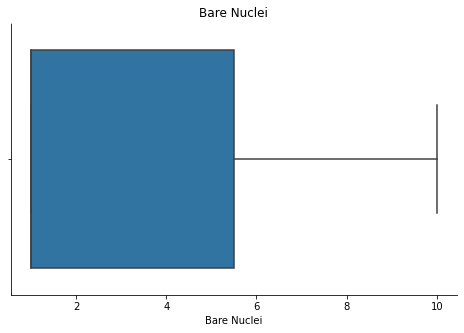

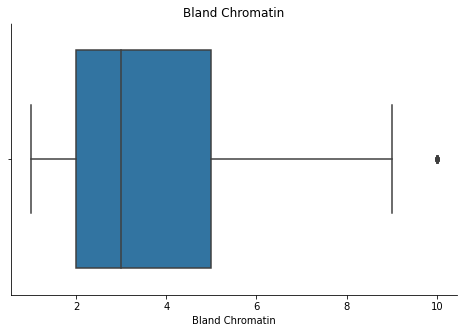

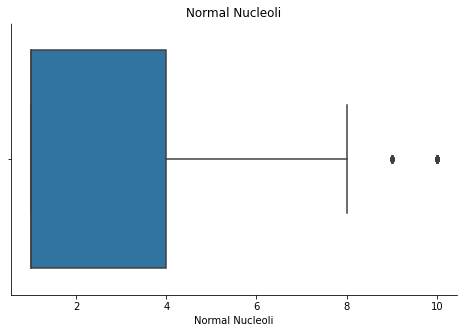

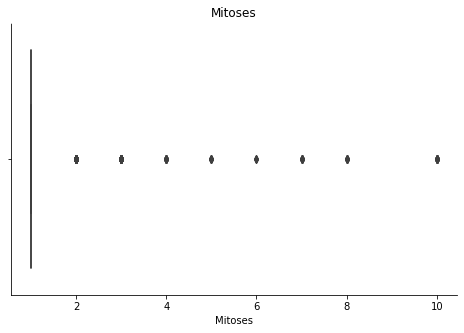

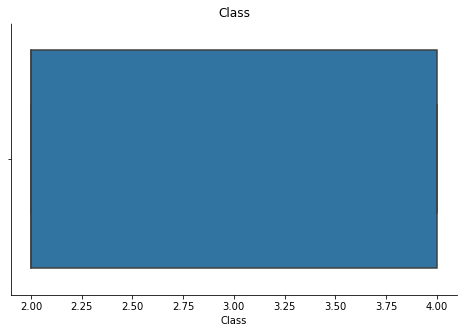

In [466]:
# GRÁFICO DE CAJAS PARA CADA VARIABLE
columns=cols
for i in columns:
    plt.figure(figsize=(8,5))
    plt.title(i)
    plt.rcParams['figure.facecolor'] = 'white'
    ax=sns.boxplot(cancer[i])
    ax.set_facecolor('white')
    ax.spines["bottom"].set_color("black")
    ax.spines["left"].set_color("black")
    ax.tick_params(axis='x', colors='black')
    ax.tick_params(axis='y', colors='black')
    ax.xaxis.label.set_color('black')
    ax.yaxis.label.set_color('black')
    ax.spines["top"].set_color("white")
    ax.spines["right"].set_color("white")
    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2
        space = 2
        va = 'bottom'
        if y_value < 0:
            space *= -1
            va = 'top'
        label = "{:.0f}".format(y_value)
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va) 

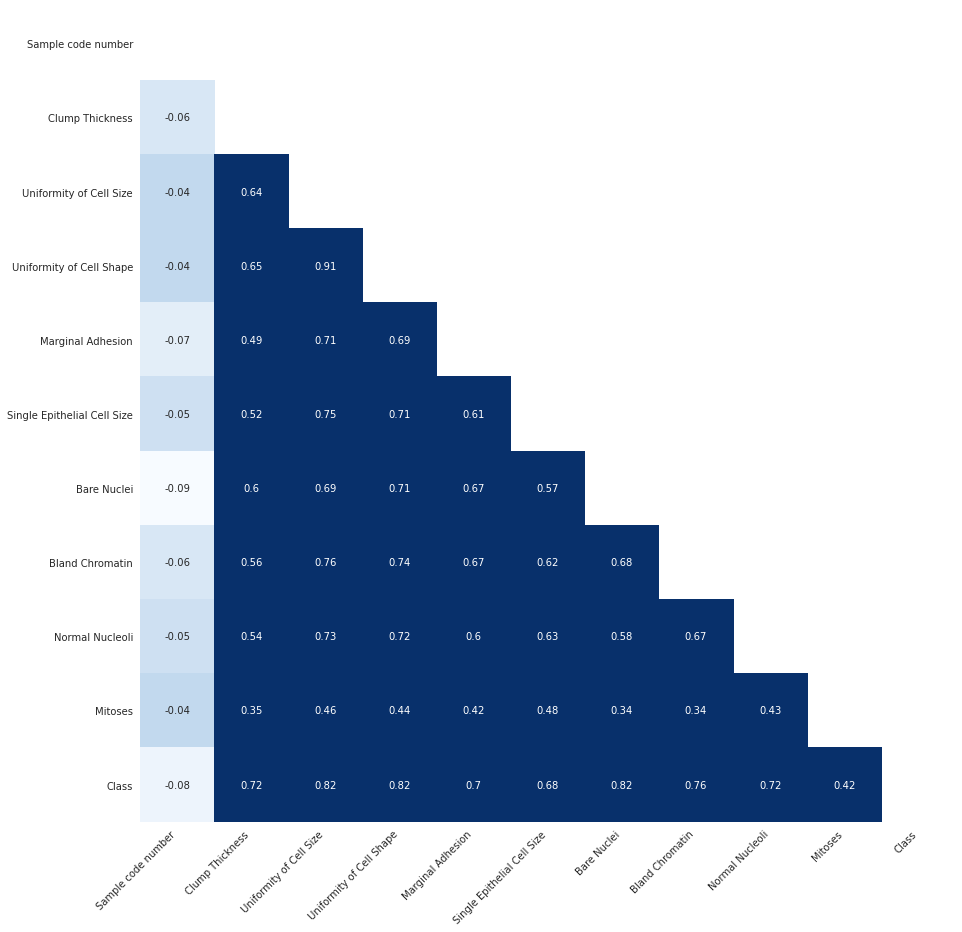

In [468]:
# GRÁFICO DE CORRELACIÓN ENTRE VARIABLES
corplot(cancer)

### CLUSTERING

#### NORMALIZACIÓN DE DATOS

In [556]:
# SE NORMALIZAN LOS DATOS
norm=(cancer-cancer.min())/(cancer.max()-cancer.min())
norm.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,0.070067,0.444444,0.000000,0.000000,0.000000,0.111111,0.000000,0.222222,0.000000,0.0,0.0
1,0.070285,0.444444,0.333333,0.333333,0.444444,0.666667,1.000000,0.222222,0.111111,0.0,0.0
2,0.071217,0.222222,0.000000,0.000000,0.000000,0.111111,0.111111,0.222222,0.000000,0.0,0.0
3,0.071281,0.555556,0.777778,0.777778,0.000000,0.222222,0.333333,0.222222,0.666667,0.0,0.0
4,0.071336,0.333333,0.000000,0.000000,0.222222,0.111111,0.000000,0.222222,0.000000,0.0,0.0


In [569]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram,linkage
clus=AgglomerativeClustering(n_clusters=2,linkage="ward").fit(norm)
md_h=pd.Series(clus.labels_)
md_h[:20]

0     1
1     1
2     1
3     1
4     1
5     0
6     1
7     1
8     1
9     1
10    1
11    1
12    0
13    1
14    0
15    0
16    1
17    1
18    0
19    1
dtype: int64

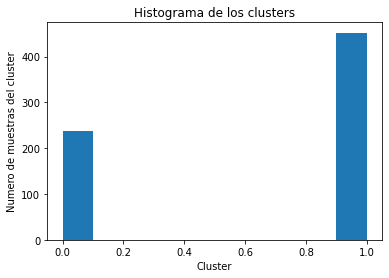

In [570]:
plt.hist(md_h)
plt.title("Histograma de los clusters")
plt.xlabel("Cluster")
plt.ylabel("Numero de muestras del cluster")
plt.show()

In [571]:
clus.children_

array([[ 135,  245],
       [ 555,  556],
       [ 196,  198],
       ...,
       [1373, 1375],
       [1369, 1376],
       [1374, 1377]], dtype=int64)

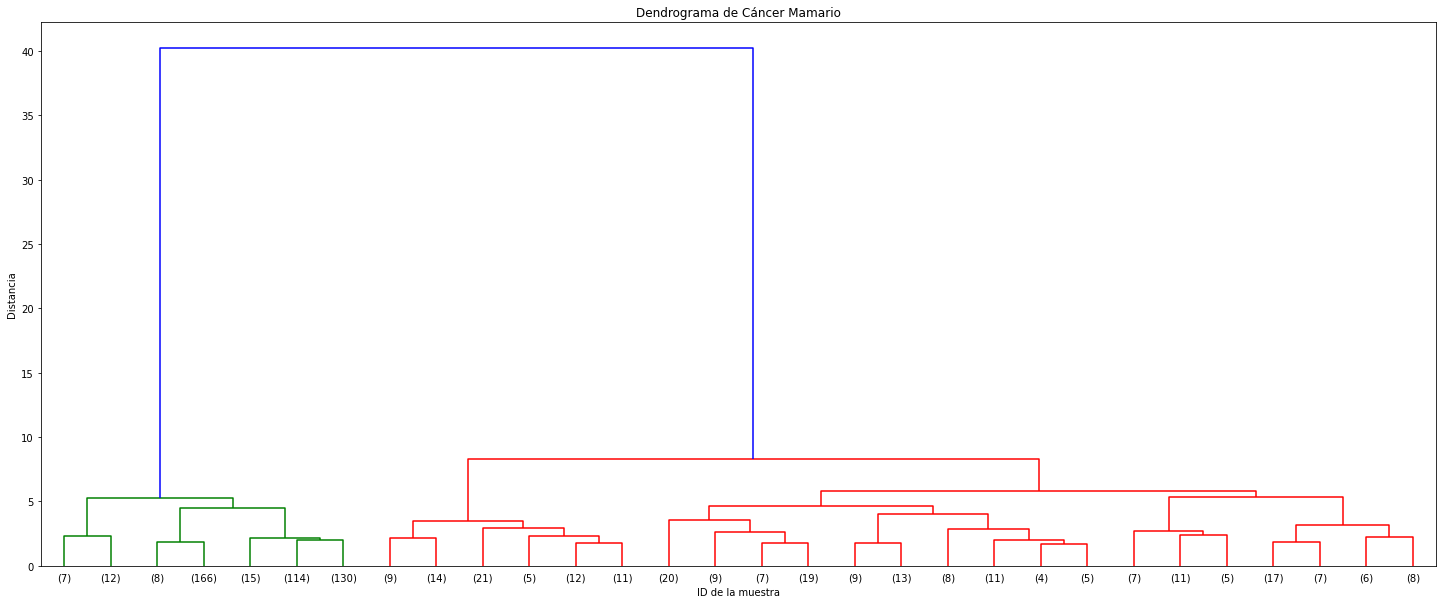

In [584]:
Z=linkage(norm,"ward")
plt.figure(figsize=(25,10))
plt.title("Dendrograma de Cáncer Mamario")
plt.xlabel("ID de la muestra")
plt.ylabel("Distancia")
dendrogram(Z,leaf_rotation=0.0,leaf_font_size=10.,truncate_mode='lastp')
plt.show()

#### K-MEANS

In [573]:
from sklearn.cluster import KMeans
from sklearn import datasets

In [577]:
model=KMeans(n_clusters=2)
model.fit(norm)
model.labels_
md_k=pd.Series(model.labels_)

In [578]:
norm["clus_h"]=md_h
norm["clus_k"]=md_k

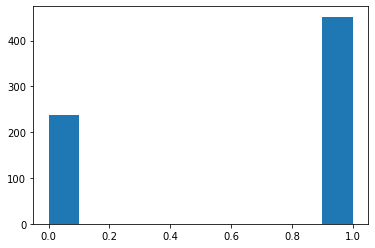

In [582]:
plt.hist(md_k)
plt.show()

In [581]:
norm.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class,clus_h,clus_k
0,0.070067,0.444444,0.000000,0.000000,0.000000,0.111111,0.000000,0.222222,0.000000,0.0,0.0,1,1
1,0.070285,0.444444,0.333333,0.333333,0.444444,0.666667,1.000000,0.222222,0.111111,0.0,0.0,1,1
2,0.071217,0.222222,0.000000,0.000000,0.000000,0.111111,0.111111,0.222222,0.000000,0.0,0.0,1,1
3,0.071281,0.555556,0.777778,0.777778,0.000000,0.222222,0.333333,0.222222,0.666667,0.0,0.0,1,1
4,0.071336,0.333333,0.000000,0.000000,0.222222,0.111111,0.000000,0.222222,0.000000,0.0,0.0,1,1


In [621]:
def Arbol(lablesColumns,targetColumn ,dataFrame, maxDep):
    from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
    from sklearn.model_selection import train_test_split # Import train_test_split function
    from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
    from sklearn import preprocessing
    from sklearn.metrics import confusion_matrix
    from sklearn.tree import export_graphviz
    from IPython.display import Image  
    import pydotplus
    X = dataFrame[lablesColumns] # Features
    y = dataFrame[targetColumn] # Target variable
    
    #from imblearn.over_sampling import SMOTE
    #os = SMOTE(sampling_strategy='auto',random_state=0,k_neighbors=5)
    #X_res, y_res = os.fit_resample(X, y)
    #X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(X_res, y_res, test_size=0.30) # 70% training and 30% test
    X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(X, y, test_size=0.30) # 70% training and 30% test
    
    # Create Decision Tree classifer object
    clf = DecisionTreeClassifier(criterion="entropy", max_depth=maxDep)
    
    # Train Decision Tree Classifer
    clf = clf.fit(X_train_t,y_train_t)

    #Predict the response for test dataset
    y_pred_t = clf.predict(X_test_t)
    
    
    print("")
    from sklearn.metrics import classification_report
    print(classification_report(y_test_t, y_pred_t))
    #dot_data = StringIO()
    #export_graphviz(clf, out_file=dot_data,  
    #              filled=True, rounded=True,
    #              special_characters=True, feature_names = feature_cols,class_names=['0','1'])
    #graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    #graph.write_png('churn.png')
    cm_t = confusion_matrix(y_test_t, y_pred_t)
    with sns.axes_style("white"):
        f, ax = plt.subplots(figsize=(2,2))
        ax = sns.heatmap(cm_t, 
                      square=True,
                      annot=True,
                      fmt="d",
                      cbar=False)
    from sklearn import tree
    with sns.axes_style():
        f, ax = plt.subplots(figsize=(20,15))
        f= clf
        ax=tree.plot_tree(f,fontsize=10)
        plt.show()
    #ax = sns.heatmap(c, mask=mask, vmax=.3, square=True,cmap="Blues",annot=True,cbar=False)
    #ax.set_xticklabels(ax.get_xticklabels(), rotation=0, horizontalalignment='right')
    #ax.set_yticklabels(ax.get_yticklabels(), rotation=0, horizontalalignment='right')
    #ax.set_xticklabels({"negative","positive"}, rotation=0, horizontalalignment='right')
    #ax.set_yticklabels({"negative","positive"}, rotation=0, horizontalalignment='right')
    #plt.show()   


              precision    recall  f1-score   support

           2       0.95      0.96      0.96       132
           4       0.93      0.92      0.93        75

    accuracy                           0.95       207
   macro avg       0.94      0.94      0.94       207
weighted avg       0.95      0.95      0.95       207



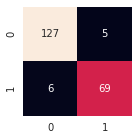

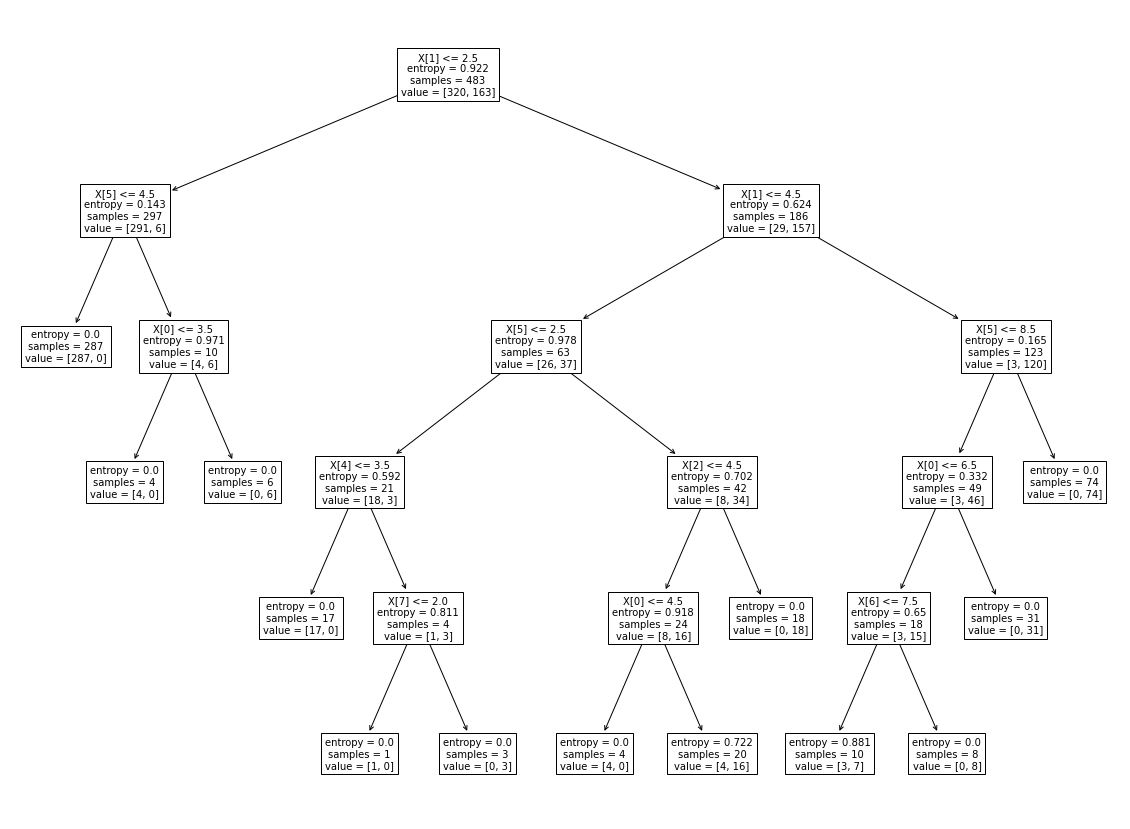

In [622]:
Arbol(cols[:9],cols[9],cancer,5)

In [ ]:
#Model Accuracy, how often is the classifier correct?
    print("Accuracy: %0.2f"%round(metrics.accuracy_score(y_test_t, y_pred_t),2))
    print("Jaccard: %0.2f"%round(metrics.jaccard_score(y_test_t, y_pred_t),2))
    print("Precision: %0.2f"%round(metrics.precision_score(y_test_t, y_pred_t,pos_label='pos'),2))
    print("Recall: %0.2f"%round(metrics.recall_score(y_test_t, y_pred_t,pos_label='pos'),2))
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    logit_roc_auc = roc_auc_score(y_test_t, clf.predict(X_test_t))
    fpr, tpr, thresholds = roc_curve(y_test_t, clf.predict_proba(X_test_t)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()